In [1]:
from google.colab import drive
drive.mount('/content/drive/')
import os

os.chdir("/content/drive/My Drive/MIMIC")
os.listdir("/content/drive/My Drive/MIMIC")

Mounted at /content/drive/


['Multi-Filter-Residual-Convolutional-Neural-Network',
 'LAAT',
 'LAAT_Run.ipynb',
 'Process_Data',
 'MResCNN_RUN.ipynb',
 'BERT_FineTune',
 'Transformer_MCP_1.ipynb',
 'Bert-Chinese-Text-Classification-Pytorch',
 'Transformer_MCP_3.ipynb',
 'caml-mimic',
 'MResCNN_RUN_2.ipynb',
 'CALM_RUN.ipynb',
 'Transformer_MCP_4.ipynb',
 'Transformer_MCP_2.ipynb',
 'FineTune_Visualization.ipynb',
 'mca_bert',
 'Does_Bert_Magic.ipynb',
 'Find_MN.ipynb',
 'transformersum',
 'Transformer_MCP_6_ClinicalBert + Heir.ipynb',
 'Transformer_MCP_7_longformer.ipynb',
 'Transformer_MCP_8_ClinicalBert512 + Heir.ipynb',
 'Transformer_MCP_5_Bert-based-model + Heir.ipynb',
 'Transformer_MCP_10_ClinicalBert512 + Heir + DataAug.ipynb',
 'Transformer_MCP_9_Bert-based-model + Heir + DataAug.ipynb',
 'Data_Augmentation.ipynb',
 'Data_Augmentation_sub3.ipynb',
 'Data_Augmentation_sub1.ipynb',
 'Data_Augmentation_sub2.ipynb']

In [2]:
# import package
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据

In [3]:
train_data_punct = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/train_50_punct.csv')
test_data_punct = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/test_50_punct.csv')
dev_data_punct = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/dev_50_punct.csv')

train_data = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/train_50.csv')
test_data = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/test_50.csv')
dev_data = pd.read_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/dev_50.csv')


In [4]:
def add_punct(text):
  result = ''
  text_list = text.split(' ')
  for index in range(len(text_list)-1):
    if text_list[index].istitle():
      result = result + ' . '+ text_list[index]
    else:
      result = result + ' ' + text_list[index]
  return result

In [5]:
def split_text(word_list,length):
  result = []
  # 我们先正向切句子
  chunk = ''
  for index in range(len(word_list)):
    chunk = chunk + ' ' + word_list[index]
    if index > 0 and index % length == 0: #我们已经记录了1200个单词
      result.append(chunk.strip())
      chunk = ''
  # 当最后 跑出循环时，chunk 还有内容，我们也加上
  if chunk != '' and len(chunk.split(' ')) >= 100:
    result.append(chunk.strip())
    chunk = ''
  return result

In [ ]:
train_data_punct.iloc[-1]

SUBJECT_ID                                                52139
HADM_ID                                                  137090
TEXT          Admission Date Discharge Date Date of Birth Se...
LABELS           511.9;287.5;486;272.4;995.92;401.9;38.93;038.9
length                                                     7567
Name: 8065, dtype: object

# Text Data Augmentation

In [ ]:
! pip install numpy requests nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 14.6 MB/s 


In [ ]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action

In [ ]:
text = 'The quick brown fox jumps over the lazy dog .'
print(text)

The quick brown fox jumps over the lazy dog .


In [ ]:
aug = naw.SynonymAug(aug_src='wordnet')

In [ ]:
text = 'predominantly fixed perfusion defect in the lad territory hospital1'
augmented_text = aug.augment(text)

print(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

predominantly fixed perfusion defect in the lad territory hospital1
Original:
predominantly fixed perfusion defect in the lad territory hospital1
Augmented Text:
['predominantly fixed perfusion shortcoming in the lad territory hospital1']


# 统计数据长度分布

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


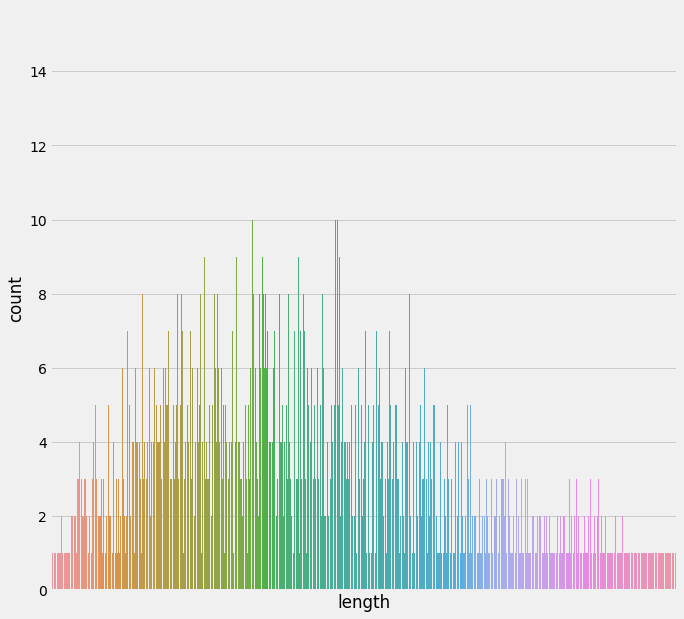

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


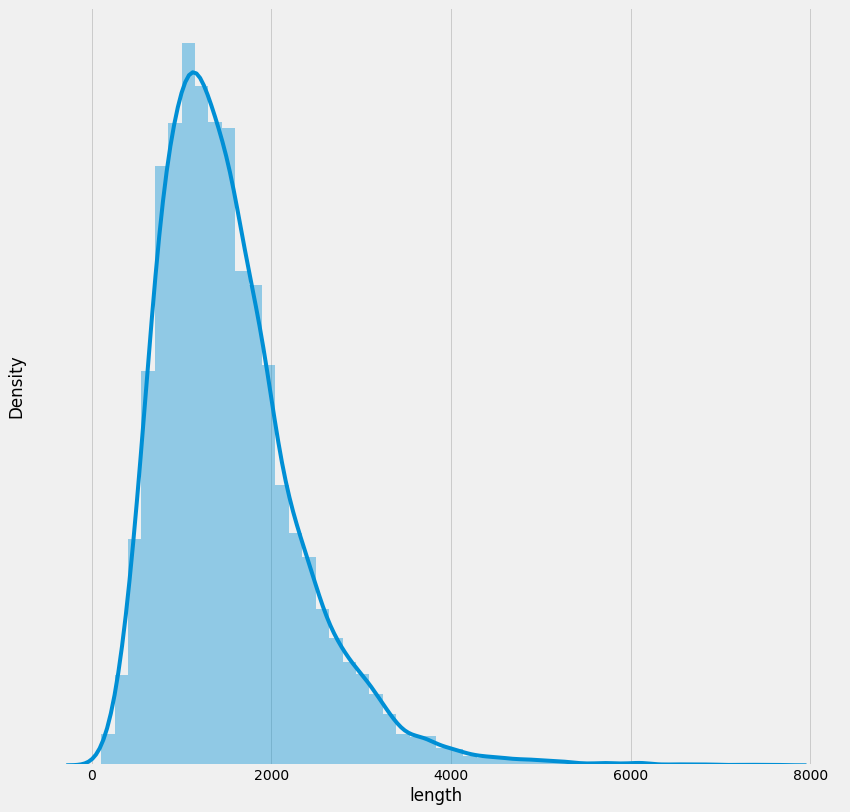

'\n# 绘制句子长度列的数量分布图\nplt.subplots(figsize=(10, 10))\nsns.countplot("length", data=train_data)\n \n# 主要关注count长度分布的纵坐标, 不需要绘制横坐标, 横坐标范围通过dist图进行查看\nplt.xticks([])\nplt.show()\n \n# 绘制dist长度分布图\nplt.subplots(figsize=(10, 10))\nsns.distplot(train_data["length"])\n \n# 主要关注dist长度分布横坐标, 不需要绘制纵坐标\nplt.yticks([])\n'

In [ ]:
# 设置显示风格
plt.style.use('fivethirtyeight')

plt.subplots(figsize=(10, 10))
# 绘制句子长度列的数量分布图
sns.countplot("length", data=train_data)
# 主要关注count长度分布的纵坐标, 不需要绘制横坐标, 横坐标范围通过dist图进行查看
plt.xticks([])
plt.show()

# 绘制dist长度分布图
# plt.subplots(figsize=(7, 7))
fig,ax = plt.subplots(figsize=(13, 13))
sns.distplot(train_data["length"])
 
# 主要关注dist长度分布横坐标, 不需要绘制纵坐标
plt.yticks([])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


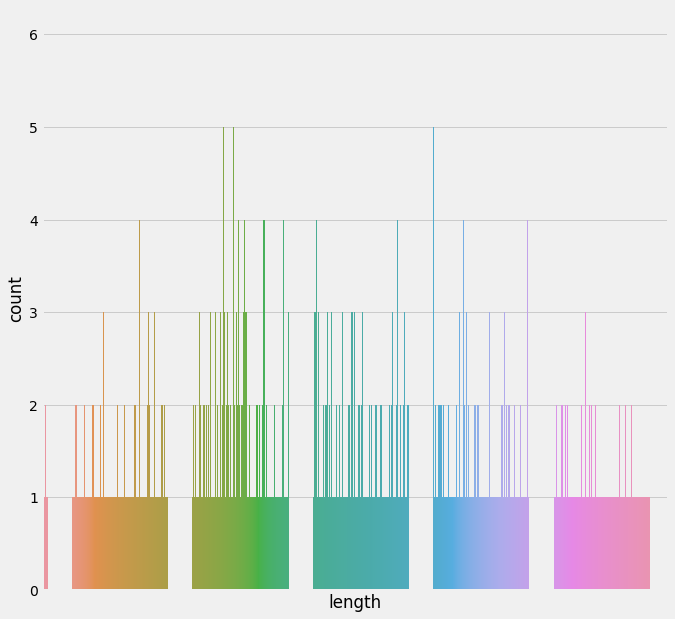

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


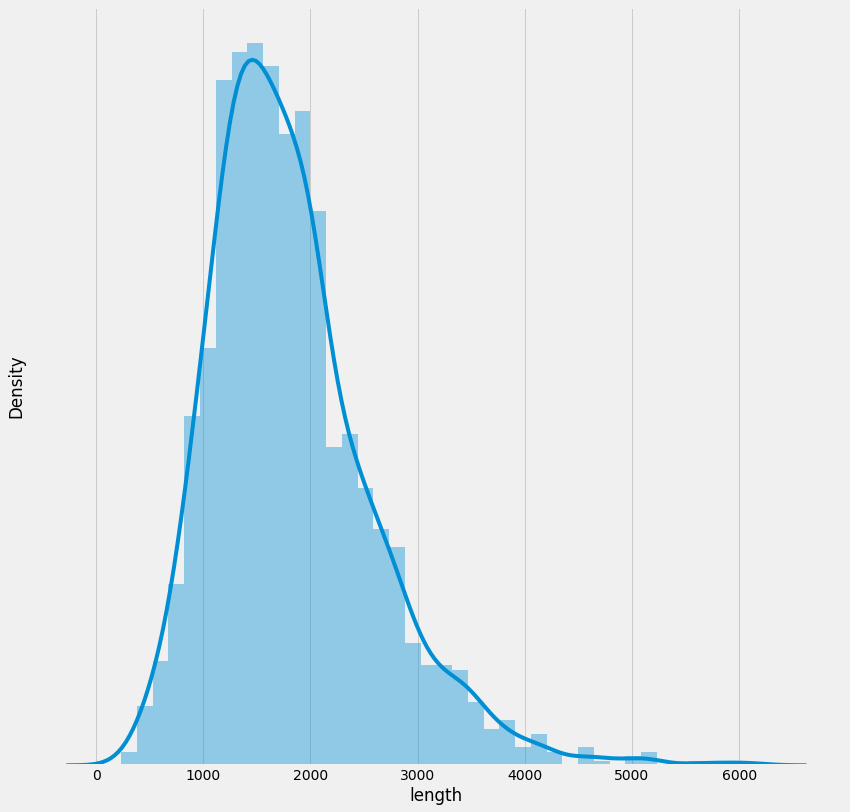

In [ ]:
# 设置显示风格
plt.style.use('fivethirtyeight')

plt.subplots(figsize=(10, 10))
# 绘制句子长度列的数量分布图
sns.countplot("length", data=test_data)
# 主要关注count长度分布的纵坐标, 不需要绘制横坐标, 横坐标范围通过dist图进行查看
plt.xticks([])
plt.show()

# 绘制dist长度分布图
# plt.subplots(figsize=(7, 7))
fig,ax = plt.subplots(figsize=(13, 13))
sns.distplot(test_data["length"])
 
# 主要关注dist长度分布横坐标, 不需要绘制纵坐标
plt.yticks([])
plt.show()

In [ ]:
dev_data[:5]

,SUBJECT_ID,HADM_ID,TEXT,LABELS,length
0,86006,111912,admission date discharge date date of birth se...,V58.61;401.9;96.71;427.31;414.01,230
1,85950,189769,admission date discharge date service neurosur...,403.90;585.9;250.00;V45.81;96.71,304
2,88025,180431,admission date discharge date date of birth se...,96.71;38.93;518.81,359
3,83776,152868,admission date discharge date date of birth se...,401.9;96.71;518.81;272.4,408
4,85055,169373,admission date discharge date date of birth se...,99.04;96.71,409


In [ ]:
dev_data[-5:]

# extractive text summarization by a pre-trained model

In [6]:
os.chdir("/content/drive/My Drive/MIMIC/transformersum")
#!tar -xzvf ./datasets/roberta-base.tar.gz

In [7]:
! pip install pytorch_lightning
! pip install transformers
! pip install torch_optimizer
! pip install wandb
! pip install rouge-score
! pip install packaging
! pip install datasets
! pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 706 kB 6.7 MB/s 
     |████████████████████████████████| 419 kB 50.6 MB/s 
     |████████████████████████████████| 5.9 MB 61.4 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires tensorboard<2.9,>=2.8, but you have tensorboard 2.10.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 7.7 MB/s 
     |████████████████████████████████| 6.6 MB 42.3 MB/s 
     |████████████████████████████████| 

In [8]:
import sys
sys.path.append("/content/drive/My Drive/MIMIC/transformersum/src")  # 注意，这里改变了地址了
from extractive import ExtractiveSummarizer 

In [9]:
os.chdir("/content/drive/My Drive/MIMIC/transformersum")

In [10]:
# model_long = ExtractiveSummarizer.load_from_checkpoint("./models/longformer/epoch=0-step=20000.ckpt")
model_roberta = ExtractiveSummarizer.load_from_checkpoint("./models/epoch=3.ckpt",strict=False)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/saving.py:264: UserWarning: Found keys that are in the model state dict but not in the checkpoint: ['word_embedding_model.embeddings.position_ids']
  f"Found keys that are in the model state dict but not in the checkpoint: {keys.missing_keys}"


In [ ]:
#add_punct(text_2_500)
#model_long.predict(add_punct(text_2_500),num_summary_sentences=2)
#model_roberta.predict(add_punct(text_2_500),num_summary_sentences=5)

' .Admission.Date.Discharge.Date.Date of.Birth.Sex.M.Service MEDICINE.Allergies.Beta.Blockers.Beta.Adrenergic.Blocking.Agts.Attending.First.Name3 LF.Chief.Complaint.Chest.Pain.Major.Surgical or.Invasive.Procedure.First.Name3 LF ECMO RIJ.History of.Present.Illness.Mr.Known lastname is a year old with a PMH significant for DM HTN a fib with LV thrombus on coumadin PHTN and non ischemic cardiomyopathy and CHF with an EF of from s p cath in that showed occlusion in RCA who presented to clinic today with days of chest pain to with associated cough but no shortness of breath.His pain was not associated with exertion as he has been pretty sedentary at home because of his condition.He has no energy and is unable to do much over the last few months.At his PCPs office he was feeling unwell with constant non radiating chest pain that was centrally located and persistent.He had not taken any medications at the time of the appointment.Dr.First.Name STitle checked an EKG that showed a rate of that w

In [76]:
def clean_text(text):
  # 最后我们把抽好的摘要做一下处理，去调句号，把所有的词改为小写
  result_clean = ''
  for word in text.split(' '):
    if word != '.' and word != '':
      result_clean = result_clean + ' ' +word.strip().lower()
  return result_clean.strip()

def get_summary(text): # 给定一个句子，我们试图把句子浓缩到length个词
  # 注意，我们的 text 必须是 有 '.' 以及 区分大小写的
  # 注意，由于我们吊桶 trasformersum 里的模型，必须保证我们使用的文本区分大小写，有句号
  # 首先，我们把text 分成200个词左右的一个个小区域
  text_chunks = []
  last_middle_sentence = ''
  middle_sentence = ''
  for sentence in text.split('.'):
    middle_sentence = middle_sentence + ' . ' + sentence
    if len(middle_sentence.split(' ')) >= 500:
      text_chunks.append(last_middle_sentence)
      last_middle_sentence = ''
      middle_sentence = ''
    else:
      last_middle_sentence = middle_sentence
  if middle_sentence != '' and len(middle_sentence.split(' ')) > 200:
    text_chunks.append(middle_sentence)
  #print(text_chunks)
  # 其次，我们在一个个小区域里进行文本摘要生成,我们希望摘要的长度控制在 length 个词以内
  summary = ''
  for chunk in text_chunks:
    summary = summary + ' ' +model_roberta.predict(chunk,num_summary_sentences=10)
  summary = clean_text(summary)
  print(len(summary.split(' ')))
  
  result = ''
  if len(summary.split(' ')) >= 1000 and len(summary.split(' ')) <= 1250:  # 如果抽出的 摘要长度在 1000 - 1400 之间，之间返回
    #print('1000 - 1250')
    #print(len(summary.split(' ')))
    result = clean_text(summary)
    #print(len(result.split(' ')))
  elif len(summary.split(' ')) < 800:
    #print('< 800')
    #print(len(summary.split(' ')),'num_chunk:',len(text_chunks))
    summary = ''
    for chunk in text_chunks:
      summary = summary + ' ' +model_roberta.predict(chunk,num_summary_sentences=14)
    result = clean_text(summary)
    #print(len(result.split(' ')))
  elif len(summary.split(' ')) < 1000 and len(summary.split(' ')) > 800:
    #print('< 1000')
    #print(len(summary.split(' ')),'num_chunk:',len(text_chunks))
    summary = ''
    for chunk in text_chunks:
      summary = summary + ' ' +model_roberta.predict(chunk,num_summary_sentences=12)
    result = clean_text(summary)
    #print(len(result.split(' ')))
  else:
    result = summary
  return result

In [50]:
test_data[1640:1645]

,SUBJECT_ID,HADM_ID,TEXT,LABELS,length
1640,92525,141986,admission date discharge date date of birth se...,V58.61;401.9;96.6;33.24;250.00;428.0;427.31;96...,3263
1641,91245,145215,admission date discharge date date of birth se...,403.90;244.9;585.9;38.91;276.1;272.4;530.81;27...,3263
1642,91883,155760,admission date discharge date service medicine...,401.9;45.13;287.5;428.0;427.31;414.01;285.1;V1...,3269
1643,90392,108989,admission date discharge date date of birth se...,285.9;038.9;276.1;272.4,3285
1644,94119,110915,admission date discharge date date of birth se...,311;285.9;486;401.9;96.6;287.5;276.2;V45.81;96...,3291


In [51]:
len(test_data_punct.iloc[1642][2].split(' '))

3269

In [78]:
summ = get_summary(add_punct(test_data_punct.iloc[1647][2]))
summ

1274


'service cardiothoracic allergies patient recorded as having allergies to urgent aortic valve replacement with size epic tissue valve illness is yo f with hx of ivdu hcv granulomatous disease of gi tract liver spleen and bone hx of cellulitis osteomyelitis of spine and chronic leg ulcers and anxiety who p w days of leg pain right worse than left bilateral leg swelling that feel hot to touch she was in her usual state of health until days ago when she noticed that her r leg was painful and swollen she took in ed vitals were ra she received 1 g vancomycin weight loss of lbs in past month decreased appetite chronic headaches non productive cough of few days v no diarrhea no changes in urine or bowel abdominal distension at baseline per pt c antibody positive negative vl neg vl hiv negative as of ivdu with unclear timeline of use thigh ulcers left upper thigh ulcer for years mssa bacteremia with endocarditis resulting in week non caseating granulomas liver biopsy bone marrow gastric antrum

In [79]:
len(summ.split(' '))

1274

# Train Model

In [ ]:
os.chdir("/content/drive/My Drive/MIMIC/transformersum")

In [ ]:
! python ./src/main.py \
  --model_name_or_path allenai/led-base-16384 \
  --model_type bert \
  --data_path ./datasets/roberta-base/ \
  --max_epochs 3 \
  --accumulate_grad_batches 2 \
  --warmup_steps 2300 \
  --max_steps 20000 \
  --gradient_clip_val 1.0 \
  --optimizer_type adamw \
  --use_scheduler linear \
  --do_train --do_test \
  --batch_size 4 \
  --data_type pt \
  --dataloader_type iterable \
  --no_use_token_type_ids

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/transformers/data/metrics/__init__.py:36: FutureWarning: This metric will be removed from the library soon, metrics should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING, FutureWarning)
/usr/local/lib/python3.7/dist-packages/transformers/data/metrics/__init__.py:42: FutureWarning: This metric will be removed from the library soon, metrics should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING, FutureWarning)
/usr/local/lib/python3.7/dist-packages/transformers/data/metrics/__init__.py:36: FutureWarning: This metric will be remov

# Data Augamentation

In [ ]:
############# 针对训练数据进行增强  ###########################
DAsplit_train_data = [[],    # SUBJECT_ID
                 [],    # HADM_ID
                 [],    # TEXT
                 [],    # LABELS
                 []]    # length

for index in range(7800,len(train_data['TEXT'])):  # len(train_data['TEXT']) 
  # 拿到一份样本的所有训练数据
  raw_info = train_data.iloc[index]
  subject_id = raw_info[0]
  hadm_id = raw_info[1]
  text = raw_info[2]
  labels= str(raw_info[3])
  length = raw_info[4]
  
  if len(text.split(' ')) <= 1200: # 如果文本本身足够短，在1200个词以内，我们就不进行 文本增强 
    DAsplit_train_data[0].append(subject_id)
    DAsplit_train_data[1].append(hadm_id)
    DAsplit_train_data[2].append(text)
    DAsplit_train_data[3].append(labels)
    DAsplit_train_data[4].append(len(text.split(' ')))
  if len(text.split(' ')) > 1800 : # 如果文本长度在1800 以上，我们进行 摘要抽取
    text_punct = train_data_punct.iloc[index][2]
    summary = get_summary(add_punct(text_punct),length=1200)
    DAsplit_train_data[0].append(subject_id)
    DAsplit_train_data[1].append(hadm_id)
    DAsplit_train_data[2].append(summary)
    DAsplit_train_data[3].append(labels)
    DAsplit_train_data[4].append(len(summary.split(' ')))
  if len(text.split(' ')) > 1600: # 如果文本的长度在2000 以上，我们进行 split, 把数据 split 开    
    text_split = split_text(text.split(' '),length=1200)
    for chunk in text_split:
      DAsplit_train_data[0].append(subject_id)
      DAsplit_train_data[1].append(hadm_id)
      DAsplit_train_data[2].append(chunk)
      DAsplit_train_data[3].append(labels)
      DAsplit_train_data[4].append(len(chunk.split(' ')))
  if index > 5710:
    print('finish:',index)

# transform to dataframe_data
DAsplit_train_data_dict =  {'SUBJECT_ID':DAsplit_train_data[0],
                            'HADM_ID':DAsplit_train_data[1],
                            'TEXT':DAsplit_train_data[2],
                            'LABELS':DAsplit_train_data[3],
                            'length':DAsplit_train_data[4]}
DAsplit_train_data_pd = pd.DataFrame.from_dict(DAsplit_train_data_dict)
DAsplit_train_data_pd.to_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/train_50_pro_7800toend.csv')

finish: 7800
finish: 7801
finish: 7802
finish: 7803
finish: 7804
finish: 7805
finish: 7806
finish: 7807
finish: 7808
finish: 7809
finish: 7810
finish: 7811
finish: 7812
finish: 7813
finish: 7814
finish: 7815
finish: 7816
finish: 7817
finish: 7818
finish: 7819
finish: 7820
finish: 7821
finish: 7822
finish: 7823
finish: 7824
finish: 7825
finish: 7826
finish: 7827
finish: 7828
finish: 7829
finish: 7830
finish: 7831
finish: 7832
finish: 7833
finish: 7834
finish: 7835
finish: 7836
finish: 7837
finish: 7838
finish: 7839
finish: 7840
finish: 7841
finish: 7842
finish: 7843
finish: 7844
finish: 7845
finish: 7846
finish: 7847
finish: 7848
finish: 7849
finish: 7850
finish: 7851
finish: 7852
finish: 7853
finish: 7854
finish: 7855
finish: 7856
finish: 7857
finish: 7858
finish: 7859
finish: 7860
finish: 7861
finish: 7862
finish: 7863
finish: 7864
finish: 7865
finish: 7866
finish: 7867
finish: 7868
finish: 7869
finish: 7870
finish: 7871
finish: 7872
finish: 7873
finish: 7874
finish: 7875
finish: 7876

In [47]:
############# 针对 测试数据进行增强  ###########################
DAsplit_test_data = [[],    # SUBJECT_ID
                 [],    # HADM_ID
                 [],    # TEXT
                 [],    # LABELS
                 []]    # length

for index in range(1400,len(test_data['TEXT'])):
  # 拿到一份样本的所有训练数据
  raw_info = test_data.iloc[index]
  subject_id = raw_info[0]
  hadm_id = raw_info[1]
  text = raw_info[2]
  labels= str(raw_info[3])
  length = raw_info[4]
  
  if len(text.split(' ')) <= 1600: # 如果文本本身足够短，在1200个词以内，我们就不进行 文本增强 
    DAsplit_test_data[0].append(subject_id)
    DAsplit_test_data[1].append(hadm_id)
    DAsplit_test_data[2].append(text)
    DAsplit_test_data[3].append(labels)
    DAsplit_test_data[4].append(len(text.split(' ')))
  if len(text.split(' ')) > 1600 : # 如果文本长度在1600 以上，我们进行 摘要抽取
    text_punct = test_data_punct.iloc[index][2]
    summary = get_summary(add_punct(text_punct),length=1200)
    DAsplit_test_data[0].append(subject_id)
    DAsplit_test_data[1].append(hadm_id)
    DAsplit_test_data[2].append(summary)
    DAsplit_test_data[3].append(labels)
    DAsplit_test_data[4].append(len(summary.split(' ')))
  print('index:',index,'\traw length:',len(text.split(' ')),'\tlength:',len(DAsplit_test_data[0]),'\tlast text length:',DAsplit_test_data[4][-1])   

index: 1400 	raw length: 2407 	length: 1 	last text length: 1011
index: 1401 	raw length: 2409 	length: 2 	last text length: 1021
index: 1402 	raw length: 2410 	length: 3 	last text length: 1052
index: 1403 	raw length: 2413 	length: 4 	last text length: 1064
index: 1404 	raw length: 2421 	length: 5 	last text length: 1066
index: 1405 	raw length: 2424 	length: 6 	last text length: 938
index: 1406 	raw length: 2427 	length: 7 	last text length: 1038
index: 1407 	raw length: 2429 	length: 8 	last text length: 1069
index: 1408 	raw length: 2429 	length: 9 	last text length: 1018
index: 1409 	raw length: 2429 	length: 10 	last text length: 1014
index: 1410 	raw length: 2429 	length: 11 	last text length: 1222
index: 1411 	raw length: 2430 	length: 12 	last text length: 1019
index: 1412 	raw length: 2435 	length: 13 	last text length: 1004
index: 1413 	raw length: 2436 	length: 14 	last text length: 1098
index: 1414 	raw length: 2436 	length: 15 	last text length: 866
index: 1415 	raw leng

KeyboardInterrupt: ignored

In [81]:
# 现在我们修改 提取summary 的参数，现有参数不太起作用了
############# 针对 测试数据进行增强  ###########################
DAsplit_test_2_data = [DAsplit_test_data[0][:224],
                       DAsplit_test_data[1][:224],
                       DAsplit_test_data[2][:224],
                       DAsplit_test_data[3][:224],
                       DAsplit_test_data[4][:224]]

In [82]:
for index in range(1624,len(test_data['TEXT'])):
  # 拿到一份样本的所有训练数据
  raw_info = test_data.iloc[index]
  subject_id = raw_info[0]
  hadm_id = raw_info[1]
  text = raw_info[2]
  labels= str(raw_info[3])
  length = raw_info[4]
  if len(text.split(' ')) > 1600 : # 如果文本长度在1600 以上，我们进行 摘要抽取
    text_punct = test_data_punct.iloc[index][2]
    summary = get_summary(add_punct(text_punct))
    DAsplit_test_2_data[0].append(subject_id)
    DAsplit_test_2_data[1].append(hadm_id)
    DAsplit_test_2_data[2].append(summary)
    DAsplit_test_2_data[3].append(labels)
    DAsplit_test_2_data[4].append(len(summary.split(' ')))
  print('index:',index,'\traw length:',len(text.split(' ')),'\tlength:',len(DAsplit_test_2_data[0]),'\tlast text length:',DAsplit_test_2_data[4][-1])

1008
index: 1624 	raw length: 3148 	length: 225 	last text length: 1008
1047
index: 1625 	raw length: 3169 	length: 226 	last text length: 1047
1262
index: 1626 	raw length: 3175 	length: 227 	last text length: 1262
1051
index: 1627 	raw length: 3177 	length: 228 	last text length: 1051
1195
index: 1628 	raw length: 3177 	length: 229 	last text length: 1195
1089
index: 1629 	raw length: 3179 	length: 230 	last text length: 1089
1156
index: 1630 	raw length: 3184 	length: 231 	last text length: 1156
1099
index: 1631 	raw length: 3185 	length: 232 	last text length: 1099
1167
index: 1632 	raw length: 3187 	length: 233 	last text length: 1167
1078
index: 1633 	raw length: 3194 	length: 234 	last text length: 1078
842
index: 1634 	raw length: 3210 	length: 235 	last text length: 948
1082
index: 1635 	raw length: 3228 	length: 236 	last text length: 1082
1162
index: 1636 	raw length: 3230 	length: 237 	last text length: 1162
1199
index: 1637 	raw length: 3235 	length: 238 	last text length:

In [83]:
# transform to dataframe_data
DAsplit_test_data_dict =  {'SUBJECT_ID':DAsplit_test_2_data[0],
                            'HADM_ID':DAsplit_test_2_data[1],
                            'TEXT':DAsplit_test_2_data[2],
                            'LABELS':DAsplit_test_2_data[3],
                            'length':DAsplit_test_2_data[4]}
DAsplit_test_data_pd = pd.DataFrame.from_dict(DAsplit_test_data_dict)
#DAsplit_test_data_pd
DAsplit_test_data_pd.to_csv('/content/drive/My Drive/MIMIC/caml-mimic/mimicdata/mimic3/test_50_pro_1400toend.csv') 